In [1]:
# from mylab import *
from deepar.dataset.time_series import MockTs
from deepar.dataset.time_series import TimeSeries
from deepar.model.lstm import DeepAR


%matplotlib inline
from numpy.random import normal
import tqdm
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


# read predict series 

(362,)


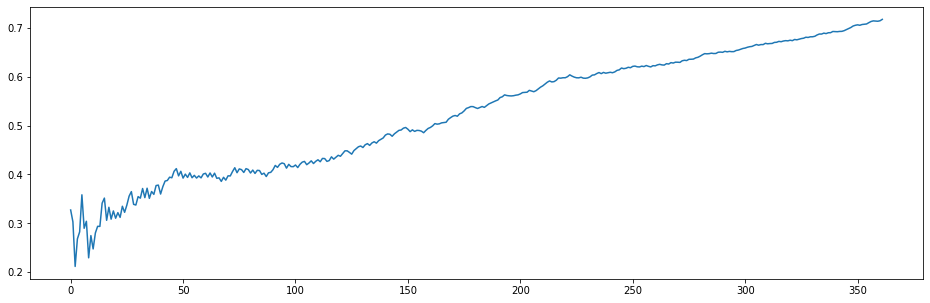

In [2]:
# read series
SIMULATE = False
OFFSET = 1.8
# OFFSET = 9

if SIMULATE:
    # simulate data
    l = []
    for i in range(400):
        y = 1.005**i+np.random.standard_normal()*0.1
        l.append(y) 
    s = pd.Series(l)
    
else:
    train_df = pd.read_csv("./temp/result_filtered.csv")
    s = train_df.ts_filtered
    s = s - OFFSET

print(s.shape)
plt.figure(figsize = (16,5))
plt.plot(s)

In [3]:
# predict all data

TIME_STEPS = 50
n_steps = TIME_STEPS
split_point = 250
fail_threshold = 0.689+0.0315
# fail_threshold = 1.23

# calculate RUL
i = 0
test_num = 250
all_df = pd.DataFrame(columns = ["num","RUL","RUL_mu","RUL_upper","RUL_lower","RUL_2upper","RUL_2lower"])
for test_num in range(split_point,len(s)-(n_steps+1)):
    
    all_df.loc[i,"num"] = test_num
    all_df.loc[i,"RUL"] = len(s)-test_num-TIME_STEPS
    try:
        predict_df = pd.read_csv("./output/predict_num/result_test_DeepAR_"+ str(test_num) +".csv")
        predict_df = predict_df.loc[predict_df.two_upper.values>fail_threshold, :]
        all_df.loc[i,"RUL_2upper"] = predict_df.index.values[0]
        predict_df = predict_df.loc[predict_df.upper.values>fail_threshold, :]
        all_df.loc[i,"RUL_upper"] = predict_df.index.values[0]
        predict_df = predict_df.loc[predict_df.mu.values>fail_threshold, :]
        all_df.loc[i,"RUL_mu"] = predict_df.index.values[0]
        predict_df = predict_df.loc[predict_df.lower.values>fail_threshold, :]
        if len(predict_df)>0:
            all_df.loc[i,"RUL_lower"] = predict_df.index.values[0]
            predict_df = predict_df.loc[predict_df.two_lower.values>fail_threshold, :]
            if len(predict_df)>0:
                all_df.loc[i,"RUL_2lower"] = predict_df.index.values[0]
        i = i+1
    except:
        print(test_num)

# save
all_df.to_csv("./output/result_RUL_20200423.csv")
print(all_df.shape)
all_df.head()

250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
(1, 7)


,num,RUL,RUL_mu,RUL_upper,RUL_lower,RUL_2upper,RUL_2lower
0,310,2,NaN,1,NaN,0,NaN


In [4]:
def plot_TUL(df):
#     plt.plot(tot_res.mu, 'bo')
    plt.plot(df.RUL_mu, linewidth=2)
    plt.plot(df.RUL, linewidth=2)
    plt.legend("real","predeict")
    plt.fill_between(x = df.index, y1=df.RUL_lower, y2=df.RUL_upper, alpha=0.5)
    plt.fill_between(x = df.index, y1=df.RUL_2lower, y2=df.RUL_2upper, alpha=0.5)
    plt.title('Prediction uncertainty')
    return 0

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

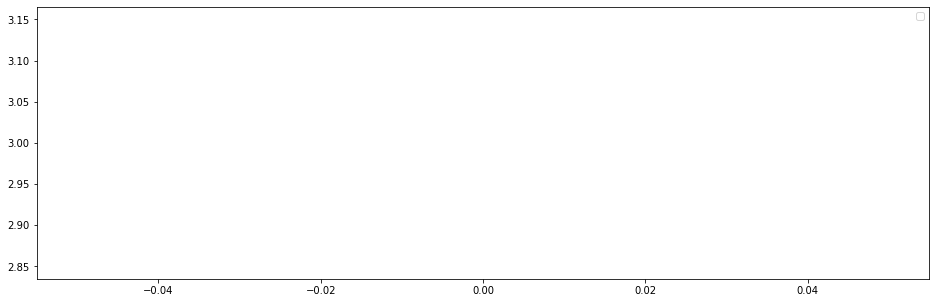

In [5]:
all_df["RUL"] = all_df["RUL"] + 1
plt.figure(figsize = (16,5))
plot_TUL(all_df)
all_df.to_csv("./output/result_RUL_20200429.csv",index = False)